In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
#dự đoán
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
#kết nối
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Customer_Sentiment.csv')


In [4]:
#xem dữ liệu
df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [5]:
#kiểm tra shape
nRow, nCol = df.shape
print("Shape of dataset {}".format(df.shape))
print(f"Rows: {nRow} \nColumns: {nCol}")

Shape of dataset (25000, 13)
Rows: 25000 
Columns: 13


In [6]:
#gồm 25000 hàng và 13 cột

In [7]:
#tiền xử lí dữ liệu

customer_id             0
gender                  0
age_group               0
region                  0
product_category        0
purchase_channel        0
platform                0
customer_rating         0
review_text             0
sentiment               0
response_time_hours     0
issue_resolved          0
complaint_registered    0
dtype: int64


<Axes: >

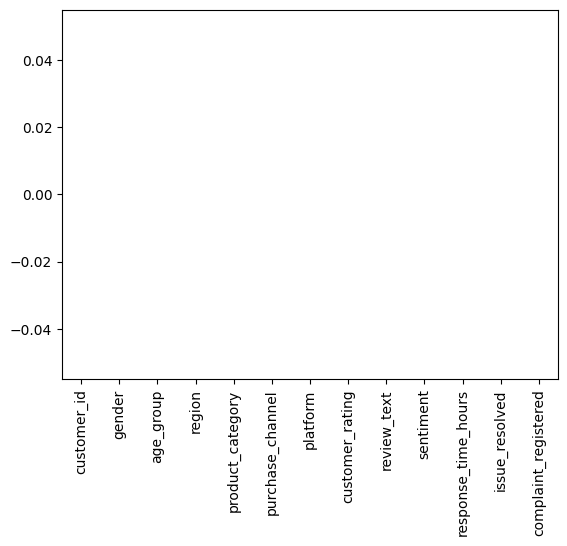

In [8]:
#kiểm tra và xóa missing data
print(df.isna().sum())
df.isna().sum().plot(kind='bar')


In [9]:
# không có dữ liệu missing

In [10]:
#Kiểm tra và xóa những giá trị trùng lặp
print(df.duplicated().value_counts())


False    25000
Name: count, dtype: int64


In [11]:
#không có trùng lặp

<Axes: xlabel='sentiment'>

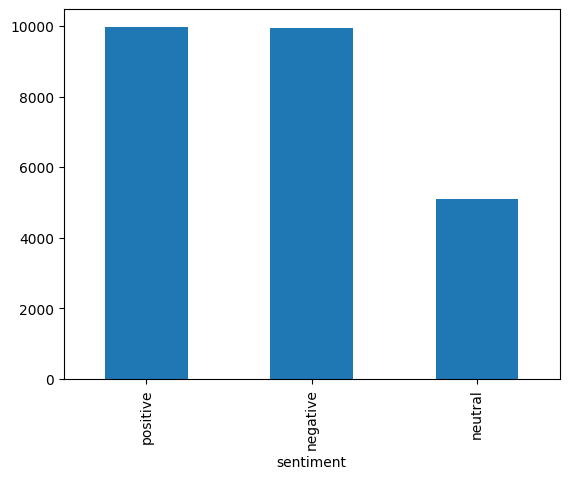

In [12]:
#trực quan hóa dữ liệu
#phân bố
df['sentiment'].value_counts().plot(kind='bar')


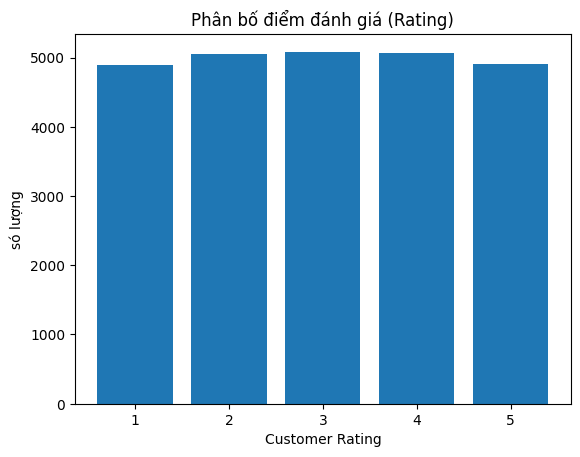

In [13]:
#bar chart thể hiện rating phân theo sentiment
rating_counts = df['customer_rating'].value_counts().sort_index()
plt.figure()
plt.bar(rating_counts.index, rating_counts.values)
plt.title("Phân bố điểm đánh giá (Rating)")
plt.xlabel("Customer Rating")
plt.ylabel("só lượng")
plt.xticks([1, 2, 3, 4, 5])
plt.show()




In [14]:
#biểu đồ mô tả tỷ lệ khiếu nại theo kênh mua hàng hoặc nền tảng đánh giá
#chuyển dữ liệu cột complaint_registered thành 1 / 0
df['complaint_binary'] = df['complaint_registered'].map({
    'yes': 1,
    'no': 0
})


In [15]:
df['complaint_binary'].value_counts()

,count
complaint_binary,
0,15063
1,9937


In [16]:
df['purchase_channel'].value_counts()


,count
purchase_channel,
online,25000


In [17]:
df['platform'].value_counts()

,count
platform,
nykaa,1301
snapdeal,1289
others,1286
reliance digital,1279
zepto,1278
facebook marketplace,1272
paytm mall,1271
myntra,1267
croma,1266


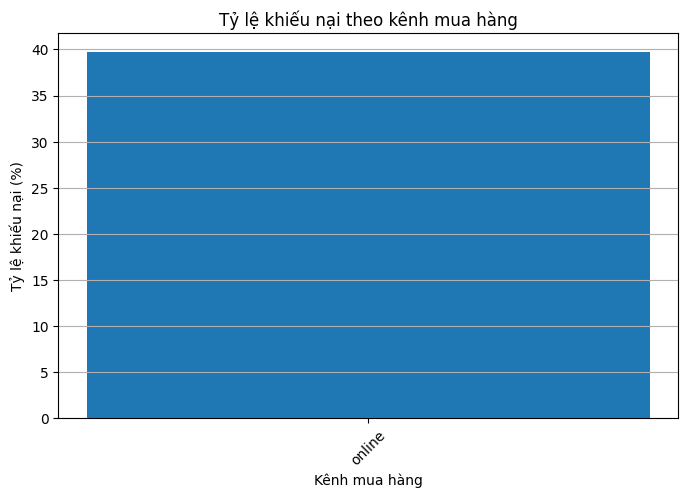

In [18]:
complaint_rate_channel = (
    df.groupby('purchase_channel')['complaint_binary']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 5))
plt.bar(
    complaint_rate_channel.index,
    complaint_rate_channel.values * 100
)
plt.title('Tỷ lệ khiếu nại theo kênh mua hàng')
plt.xlabel('Kênh mua hàng')
plt.ylabel('Tỷ lệ khiếu nại (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [19]:
#tỷ lệ khiếu nại theo từng nền tảng (platform)
complaint_rate_platform = (
    df.groupby('platform')['complaint_binary']
    .mean()
    .sort_values(ascending=False)
)

complaint_rate_platform


,complaint_binary
platform,
flipkart,0.429589
snapdeal,0.415826
croma,0.415482
shopclues,0.414754
bigbasket,0.414634
nykaa,0.404304
others,0.402799
meesho,0.396774
lenskart,0.396454


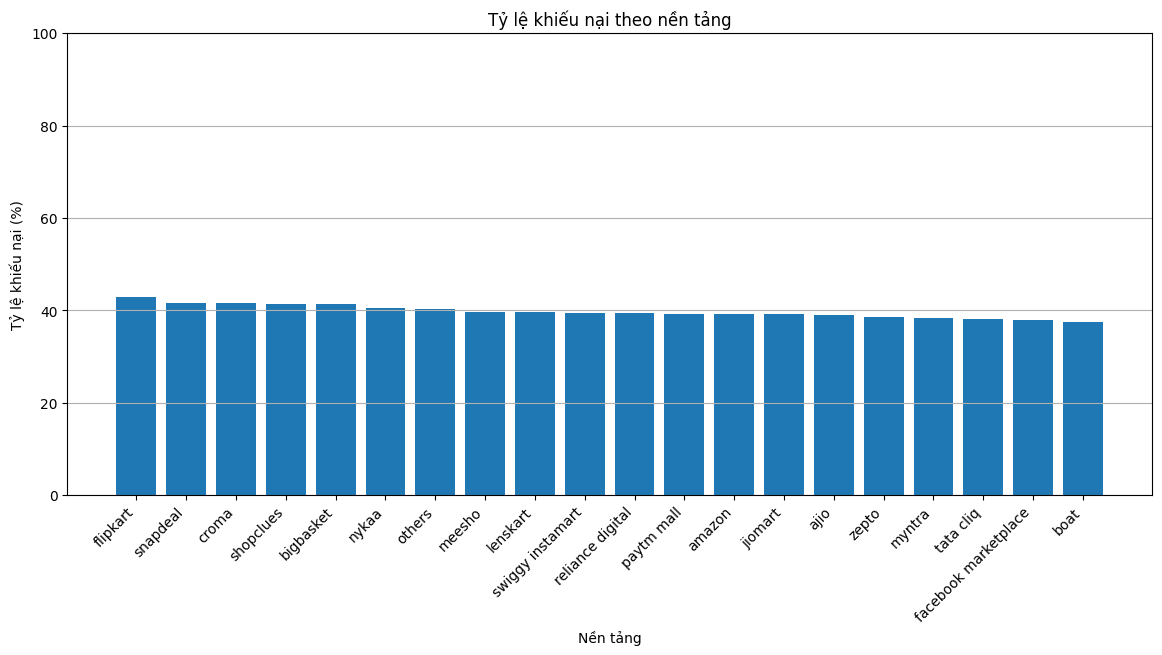

In [20]:
plt.figure(figsize=(14, 6))
plt.bar(
    complaint_rate_platform.index,
    complaint_rate_platform.values * 100
)

plt.title('Tỷ lệ khiếu nại theo nền tảng')
plt.xlabel('Nền tảng')
plt.ylabel('Tỷ lệ khiếu nại (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-649461070.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


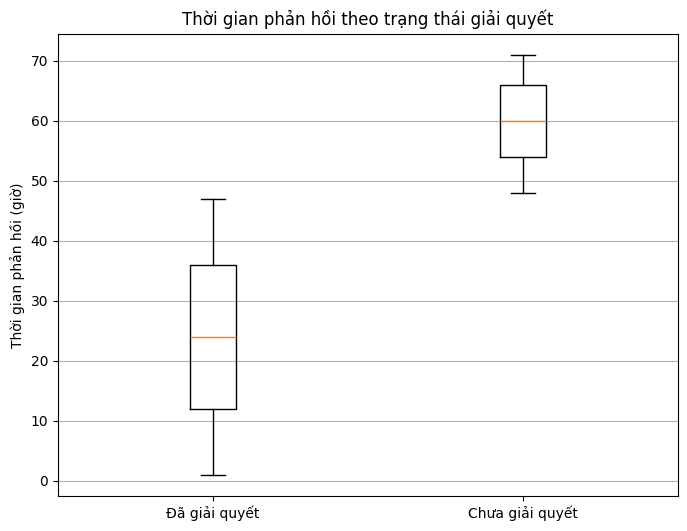

In [21]:
resolved = df[df['issue_resolved'] == 'yes']['response_time_hours']
not_resolved = df[df['issue_resolved'] == 'no']['response_time_hours']
plt.figure(figsize=(8, 6))
plt.boxplot(
    [resolved.dropna(), not_resolved.dropna()],
    labels=['Đã giải quyết', 'Chưa giải quyết'],
    showfliers=True
)
plt.title('Thời gian phản hồi theo trạng thái giải quyết')
plt.ylabel('Thời gian phản hồi (giờ)')
plt.grid(axis='y')
plt.show()


In [22]:
df['review_text'].value_counts()
#review_text có thể bỏ vào mã hóa nếu giá trị ít

,count
review_text,
"amazing experience, highly recommend!",2109
late delivery and poor packaging.,2044
not worth the price.,2026
customer service was unhelpful.,2007
very satisfied with the quality.,1980
great value for money.,1971
excellent product! exceeded expectations.,1970
very disappointed with the quality.,1952
fast delivery and great packaging.,1948


**mã hóa**

In [23]:
#chuyển các cột yes/ no thành 1/ 0
df['issue_resolved'] = df['issue_resolved'].map({'yes':1, 'no':0})
df['complaint_registered'] = df['complaint_registered'].map({'yes':1, 'no':0})

In [24]:
df['age_group'].value_counts()

,count
age_group,
46-60,5059
60+,5049
18-25,4990
26-35,4956
36-45,4946


In [25]:
#mã hóa
#label
age_mapping = {
    '18-25': 0,
    '26-35': 1,
    '36-45': 2,
    '46-60': 3,
    '60+': 4
}

df['age_group'] = df['age_group'].map(age_mapping)
#onehot
categorical_cols = [
    'gender',          # Giới tính
    'region',          # Khu vực
    'product_category',# Loại sản phẩm
    'purchase_channel',# Kênh mua hàng
    'platform',        # Nền tảng
    'sentiment',       # Positive/Negative/Neutral

]
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,  # các cột categorical muốn mã hóa
    drop_first=True            # bỏ 1 cột để tránh dummy trap
)

**chuẩn hóa**

In [26]:
#tạo cột text_length thay cho review_text để chuẩn hóa vì không đọc được dạng chữ
df['text_length'] = df['review_text'].astype(str).apply(len)
# Kiểm tra
df[['review_text','text_length']].head()

,review_text,text_length
0,very disappointed with the quality.,35
1,fast delivery and great packaging.,34
2,very disappointed with the quality.,35
3,product stopped working after few days.,39
4,neutral about the quality.,26


In [27]:
#chuẩn hóa
num_cols = ['customer_rating', 'text_length','age_group']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df[num_cols].mean())
print(df[num_cols].std())

customer_rating    1.642775e-16
text_length       -3.453948e-16
age_group         -1.000444e-16
dtype: float64
customer_rating    1.00002
text_length        1.00002
age_group          1.00002
dtype: float64


In [28]:
df_encoded.head()

,customer_id,age_group,customer_rating,review_text,response_time_hours,issue_resolved,complaint_registered,complaint_binary,gender_male,gender_other,...,platform_others,platform_paytm mall,platform_reliance digital,platform_shopclues,platform_snapdeal,platform_swiggy instamart,platform_tata cliq,platform_zepto,sentiment_neutral,sentiment_positive
0,1,4,1,very disappointed with the quality.,46,1,1,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,3,5,fast delivery and great packaging.,5,1,0,0,False,True,...,False,False,False,False,False,True,False,False,False,True
2,3,2,1,very disappointed with the quality.,38,1,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2,product stopped working after few days.,16,1,1,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,0,3,neutral about the quality.,15,1,0,0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered,complaint_binary,text_length
0,1,male,1.405589,north,automobile,online,flipkart,-1.425640,very disappointed with the quality.,negative,46,1,1,1,0.486262
1,2,other,0.699674,central,books,online,swiggy instamart,1.422108,fast delivery and great packaging.,positive,5,1,0,0,0.320793
2,3,female,-0.006240,east,sports,online,facebook marketplace,-1.425640,very disappointed with the quality.,negative,38,1,1,1,0.486262
3,4,female,-1.418069,central,groceries,online,zepto,-0.713703,product stopped working after few days.,negative,16,1,1,1,1.148141
4,5,female,-1.418069,east,electronics,online,croma,-0.001766,neutral about the quality.,neutral,15,1,0,0,-1.002964


In [30]:
#phân chia dữ liệu thành 2 phần x, y
X = df_encoded.drop(columns=[
    'issue_resolved',
    'review_text',
    'complaint_registered',
    'complaint_binary',
    'response_time_hours'
])
y = df_encoded['issue_resolved']



In [31]:
#chia thành x_train, y_train, x_test, y_test
# Chia 80% train, 20% test
#drop cột review_text
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% dữ liệu dùng để test
    random_state=42,     # để kết quả chia dữ liệu reproducible
    stratify=y           # giữ tỉ lệ 0/1 giống nhau trong train và test
)

In [32]:
#kiểm tra shape
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)



Train size: (20000, 38) (20000,)
Test size: (5000, 38) (5000,)


**random Forest**

In [33]:
#Train random Forest

rf = RandomForestClassifier(
    n_estimators=200,       # số cây
    max_depth=10,           # độ sâu tối đa của cây
    random_state=42,
    class_weight='balanced' # cân bằng lớp nếu dữ liệu imbalance
)

#Huấn luyện model trên tập train
rf.fit(X_train, y_train)   # đây là bước huấn luyện

# Dự đoán nhãn trên tập test
y_pred = rf.predict(X_test)

#đánh giá
#Accuracy
acc_rf= accuracy_score(y_test, y_pred)
print("Accuracy:", acc_rf)
#F1-score
f1_rf = f1_score(y_test, y_pred)
print("F1-score:", f1_rf)

Accuracy: 0.5612
F1-score: 0.6783934330108473


**Logistic Regression (Hồi quy Logistic)**

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)
#huấn luyện
lr.fit(X_train, y_train)
#dự đoán
y_pred = lr.predict(X_test)
# Accuracy
acc_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_lr)
# F1-score
f1_lr = f1_score(y_test, y_pred)
print("F1-score:", f1_lr)



Accuracy: 0.506
F1-score: 0.5789294237981589


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
#huấn luyện
nb.fit(X_train, y_train)
# dự đoán
y_pred = nb.predict(X_test)
#đánh giá
# Accuracy
acc_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_nb)

# F1-score
f1_nb = f1_score(y_test, y_pred)
print("F1-score:", f1_nb)

Accuracy: 0.6638
F1-score: 0.7979324438033417


**K-NN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#train
knn = KNeighborsClassifier(
    n_neighbors=5,       # số láng giềng gần nhất
    weights='uniform',   # mỗi láng giềng cân bằng
    metric='euclidean'   # khoảng cách Euclidean
)

#huấn luyện
knn.fit(X_train, y_train)

# dự đoán
y_pred = knn.predict(X_test)

# Đánh giá
# Accuracy
acc_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_knn)

# F1-score
f1_knn = f1_score(y_test, y_pred)
print("F1-score:", f1_knn)

Accuracy: 0.584
F1-score: 0.7117516629711752


**so sánh accuracy và F1**

In [39]:
#so sánh accuracy
results_accuracy = {
    'Random Forest': acc_rf,
    'Naive Bayes': acc_nb,
    'K-NN': acc_knn,
    'Logistic Regression': acc_lr
}
#so sánh F1
results_f1 = {
    'Random Forest': f1_rf,
    'Naive Bayes': f1_nb,
    'K-NN': f1_knn,
    'Logistic Regression': f1_lr
}
results_df = pd.DataFrame(list(results_accuracy.items()), columns=['Mô hình', 'Độ chính xác'])
results_ff = pd.DataFrame(list(results_f1.items()), columns=['Mô hình', 'Độ chính xác'])
results_df = results_df.sort_values('Độ chính xác', ascending=False)
results_ff = results_ff.sort_values('Độ chính xác', ascending=False)
print("BẢNG SO SÁNH ĐỘ CHÍNH XÁC Accuracy:")
print(results_df)
print("\nBẢNG SO SÁNH ĐỘ CHÍNH XÁC F1:")
print(results_ff)


BẢNG SO SÁNH ĐỘ CHÍNH XÁC Accuracy:
               Mô hình  Độ chính xác
1          Naive Bayes        0.6638
2                 K-NN        0.5840
0        Random Forest        0.5612
3  Logistic Regression        0.5060

BẢNG SO SÁNH ĐỘ CHÍNH XÁC F1:
               Mô hình  Độ chính xác
1          Naive Bayes      0.797932
2                 K-NN      0.711752
0        Random Forest      0.678393
3  Logistic Regression      0.578929


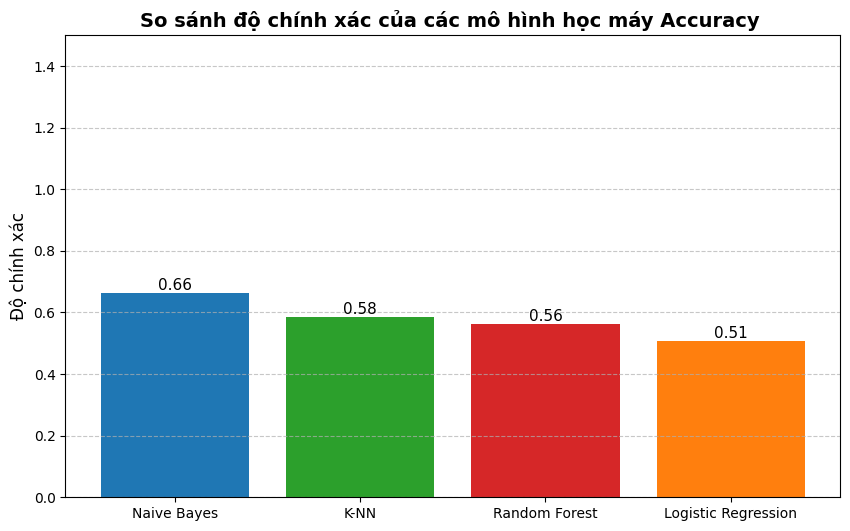

In [40]:
# biểu đồ acc
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']  # màu cho từng mô hình
bars = plt.bar(results_df['Mô hình'], results_df['Độ chính xác'], color=colors)
# Thêm nhãn và tiêu đề
plt.ylabel('Độ chính xác', fontsize=12)
plt.title('So sánh độ chính xác của các mô hình học máy Accuracy ', fontsize=14, fontweight='bold')
plt.ylim(0, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên từng cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', fontsize=11)

plt.show()





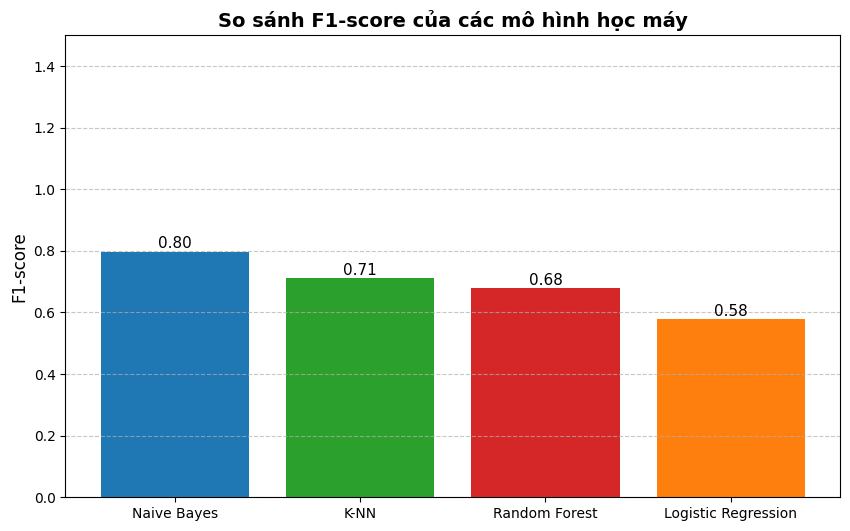

In [41]:
# Biểu đồ F1-score
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']  # màu cho 4 mô hình

bars_f1 = plt.bar(results_ff['Mô hình'], results_ff['Độ chính xác'], color=colors)

# Thêm nhãn và tiêu đề
plt.ylabel('F1-score', fontsize=12)
plt.title('So sánh F1-score của các mô hình học máy', fontsize=14, fontweight='bold')
plt.ylim(0, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên từng cột
for bar in bars_f1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', fontsize=11)

plt.show()

**Confusion Matrix**

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test, y_test, model_name):
    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Vẽ
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues'
    )
    plt.xlabel("Giá trị dự đoán")
    plt.ylabel("Giá trị thực tế")
    plt.title(f"Ma trận nhầm lẫn - {model_name}")
    plt.show()

    # In thêm báo cáo
    print(f"=== Classification Report - {model_name} ===")
    print(classification_report(y_test, y_pred))



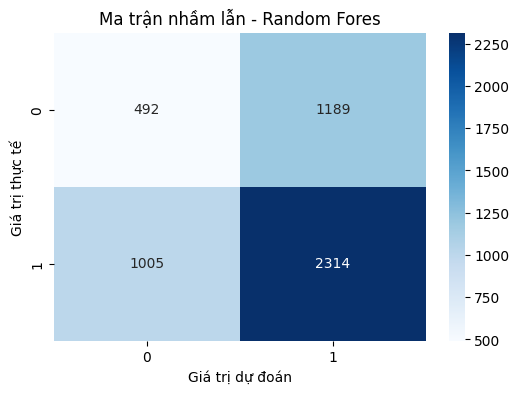

=== Classification Report - Random Fores ===
              precision    recall  f1-score   support

           0       0.33      0.29      0.31      1681
           1       0.66      0.70      0.68      3319

    accuracy                           0.56      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.55      0.56      0.55      5000



In [43]:
plot_confusion_matrix(rf, X_test, y_test, "Random Fores")

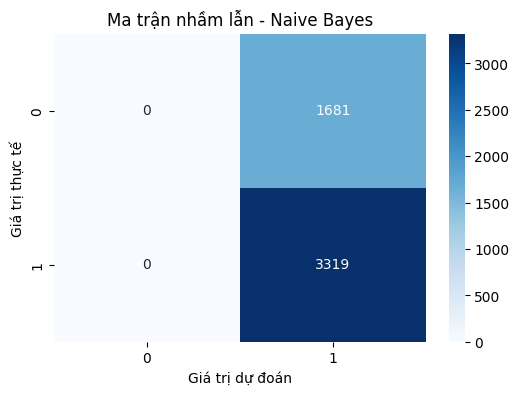

=== Classification Report - Naive Bayes ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1681
           1       0.66      1.00      0.80      3319

    accuracy                           0.66      5000
   macro avg       0.33      0.50      0.40      5000
weighted avg       0.44      0.66      0.53      5000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
plot_confusion_matrix(nb, X_test, y_test, "Naive Bayes")

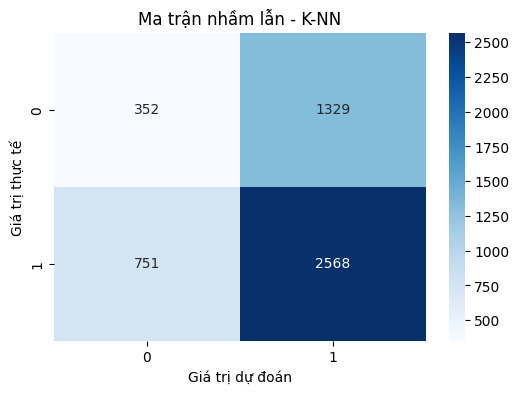

=== Classification Report - K-NN ===
              precision    recall  f1-score   support

           0       0.32      0.21      0.25      1681
           1       0.66      0.77      0.71      3319

    accuracy                           0.58      5000
   macro avg       0.49      0.49      0.48      5000
weighted avg       0.54      0.58      0.56      5000



In [45]:
plot_confusion_matrix(knn, X_test, y_test, "K-NN")

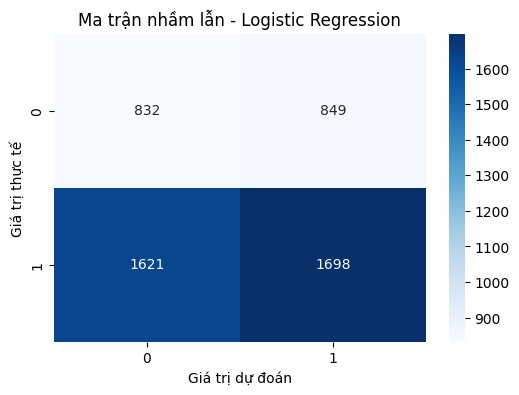

=== Classification Report - Logistic Regression ===
              precision    recall  f1-score   support

           0       0.34      0.49      0.40      1681
           1       0.67      0.51      0.58      3319

    accuracy                           0.51      5000
   macro avg       0.50      0.50      0.49      5000
weighted avg       0.56      0.51      0.52      5000



In [46]:
plot_confusion_matrix(lr, X_test, y_test, "Logistic Regression")

**Siêu tham số (Hyperparameter Tuning)**

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1',      # vì data imbalance
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best params RF:", grid_rf.best_params_)
print("Best F1 RF:", grid_rf.best_score_)


Best params RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 RF: 0.7598716332912618


**Confusion Matrix cho siêu tham số**

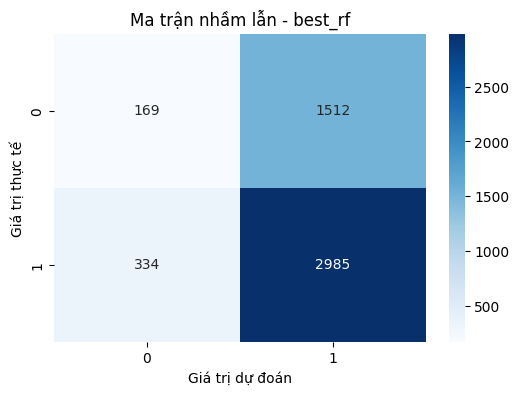

=== Classification Report - best_rf ===
              precision    recall  f1-score   support

           0       0.34      0.10      0.15      1681
           1       0.66      0.90      0.76      3319

    accuracy                           0.63      5000
   macro avg       0.50      0.50      0.46      5000
weighted avg       0.55      0.63      0.56      5000



In [48]:
best_rf = grid_rf.best_estimator_
plot_confusion_matrix(best_rf, X_test, y_test, "best_rf")
